# Iris dataset - Regressão Logística - 3 classes

## Objetivos

Este notebook ilustra o problema de classificação.

O objetivo é classificar as amostras da Íris em 3 classes.
- o alvo é o índice da classe: 0, 1 ou 2
- função de perda é Entropia Cruzada
- rede é uma camada densa linear com duas entradas e três saídas (n. de classes)

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoSoftmax_CrossEntropy_Otimizacao.png)

## Importação das bibliotecas

In [1]:
# http://pytorch.org/
from os.path import exists
#!pip install numpy==1.15.0
!pip install -q install wheel==0.34.2 setuptools

from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
print(get_abbr_impl())
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

#https://download.pytorch.org/whl/cpu/torch-0.4.1.post2-cp37-cp37m-linux_x86_64.whl
!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1.post2-{platform}-linux_x86_64.whl torchvision
import torch

cp
  ERROR: HTTP error 403 while getting http://download.pytorch.org/whl/cpu/torch-0.4.1.post2-cp310-cp310-linux_x86_64.whl
ERROR: Could not install requirement torch==0.4.1.post2 from http://download.pytorch.org/whl/cpu/torch-0.4.1.post2-cp310-cp310-linux_x86_64.whl because of HTTP error 403 Client Error: Forbidden for url: http://download.pytorch.org/whl/cpu/torch-0.4.1.post2-cp310-cp310-linux_x86_64.whl for URL http://download.pytorch.org/whl/cpu/torch-0.4.1.post2-cp310-cp310-linux_x86_64.whl


In [2]:
%matplotlib inline
import os
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

from IPython import display

## Dataset: Leitura, normalização e visualização dos dados

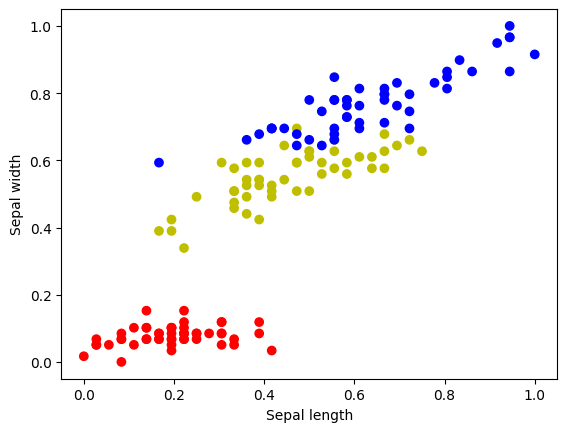

In [3]:
iris = load_iris()
X = iris.data[:,::2]  # comprimento das sépalas e pétalas, indices 0 e 2
# normalização
Xc = X - X.min(axis=0)
Xs = Xc.max(axis=0)
Xc = Xc/Xs

Y = iris.target
colors = np.array(['r','y','b'])
plt.scatter(Xc[:, 0], Xc[:, 1], c=colors[Y])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

### Prepara os dados para o PyTorch

In [4]:
X_tensor = torch.FloatTensor(Xc)  # Entrada é FloatTensor
Y_tensor = torch.LongTensor(Y)    # Classe é LongTensor

In [5]:
Y_tensor

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

## Construindo o modelo da rede

A saída da rede é composta por um neurônio para cada classe. A saída é denominada *scores* ou logitos:

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoLogisticaRede_2_3.png)

In [7]:
model = nn.Linear(2,3)  # 2 entradas e 3 saídas

In [8]:
model.state_dict()

OrderedDict([('weight',
              tensor([[ 0.1962, -0.2884],
                      [ 0.1762,  0.6132],
                      [ 0.0419, -0.5135]])),
             ('bias', tensor([-0.6177, -0.6500, -0.0381]))])

### Fazendo um predict

In [9]:
out = model(Variable(X_tensor[:4,:])) # 4 amostras
out

tensor([[-0.5936, -0.5692, -0.0636],
        [-0.6045, -0.5790, -0.0659],
        [-0.6105, -0.5992, -0.0595],
        [-0.6258, -0.5833, -0.0781]], grad_fn=<AddmmBackward0>)

In [11]:
oo = F.softmax(out,dim=1)
oo

tensor([[0.2686, 0.2752, 0.4563],
        [0.2674, 0.2743, 0.4583],
        [0.2669, 0.2700, 0.4631],
        [0.2651, 0.2766, 0.4584]], grad_fn=<SoftmaxBackward0>)

### Calculando as probabilidades com Softmax

- [Wikipedia:Softmax_function](https://en.wikipedia.org/wiki/Softmax_function)

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/softmax.png)

In [12]:
F.softmax(out,dim=1)*100

tensor([[26.8553, 27.5185, 45.6262],
        [26.7421, 27.4329, 45.8250],
        [26.6926, 26.9969, 46.3105],
        [26.5074, 27.6570, 45.8356]], grad_fn=<MulBackward0>)

### Predição da classe

In [13]:
prob,y_pred = torch.max(F.softmax(out,dim=1),dim=1)
print(y_pred)
print(prob)

tensor([2, 2, 2, 2])
tensor([0.4563, 0.4583, 0.4631, 0.4584], grad_fn=<MaxBackward0>)


## Treinamento

### Classe para visualização dinâmica

In [14]:
def predict(model, inputs):
    outputs = model(Variable(inputs))
    _, predicts = torch.max(outputs, 1)

    return predicts.data.numpy()

def predict_prob(model, inputs):
    outputs = model(Variable(inputs))
    outputs = F.softmax(outputs,dim=1)
    predicts, _ = torch.max(outputs, 1)

    return predicts.data.numpy()

class MyPlotter():
    def __init__(self, model, X, Y, n_epoch, filepath=None, h = .01):
        self.model = model
        self.X = X
        self.Y = Y
        self.n_epoch = n_epoch
        self.filepath = filepath
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        self.xx, self.yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        self.loss_hist = []
        self.val_loss_hist = []
        self.X_grid = np.c_[self.xx.ravel(), self.yy.ravel()]

        #Gráficos a serem mostrados pelo callback
        self.fig = plt.figure(figsize=(12, 4), dpi=100)
        self.ax1 = self.fig.add_subplot(1, 3, 1)
        self.ax1.set_xlim(0, nb_epoch)
        self.ax1.set_xlabel('Epoca')#,fontsize=28)
        self.ax1.set_ylabel('Perda')#,fontsize=28)
        self.ax1.set_title('Perda x Época')
        self.ax1.plot([],[],'b',linewidth = 2.0,label = "Treino")
        self.ax1.grid(True)

        self.ax2 = self.fig.add_subplot(1, 3, 2)
        self.ax2.set_xlim(Xc[:,0].min(), Xc[:,0].max())
        self.ax2.set_ylim(Xc[:,1].min(), Xc[:,1].max())
        self.ax2.set_xlabel('Comprimento da Sepala')#,fontsize=28)
        self.ax2.set_ylabel('Largura da Sepala')#,fontsize=28)
        self.ax2.set_title('Fronteiras de decisão')

        self.ax3 = self.fig.add_subplot(1, 3, 3)
        self.ax3.set_xlim(Xc[:,0].min(), Xc[:,0].max())
        self.ax3.set_ylim(Xc[:,1].min(), Xc[:,1].max())
        self.ax3.set_xlabel('Comprimento da Sepala')#,fontsize=28)
        self.ax3.set_ylabel('Largura da Sepala')#,fontsize=28)
        self.ax3.set_title('Máxima probabilidade')

    def on_train_begin(self, logs={}):
        display.display(self.fig)
        display.clear_output(wait=True)

    def on_epoch_end(self, epoch, logs={}):
        if 'loss' in logs.keys():
            self.loss_hist.append(logs['loss'])

            if epoch%250==0:
                self.ax1.plot(np.arange(epoch+1), self.loss_hist, 'b', linewidth = 2.0)

                #Z = predict(self.model, torch.from_numpy(self.X_grid).type(torch.FloatTensor))
                Zc = predict(self.model,torch.FloatTensor(self.X_grid))
                Zc = Zc.reshape(self.xx.shape)

                self.ax2.pcolormesh(self.xx, self.yy, Zc, cmap=plt.cm.Paired)
                colors = np.array(['r','y','b'])
                self.ax2.scatter(self.X[:, 0], self.X[:, 1], s=40, c=colors[self.Y], edgecolors='k', cmap=plt.cm.Paired)

                Zp = predict_prob(self.model,torch.FloatTensor(self.X_grid))
                Zp = Zp.reshape(self.xx.shape)

                self.ax3.pcolormesh(self.xx, self.yy, Zp, cmap=plt.cm.magma)
                colors = np.array(['r','y','b'])
                self.ax3.scatter(self.X[:, 0], self.X[:, 1], s=40, c=colors[self.Y], edgecolors='k', cmap=plt.cm.Paired)

                display.display(self.fig)
                display.clear_output(wait=True)

### Laço principal de treinamento da Regressão Logística por Softmax

In [15]:
lr = 0.15

optimizer = torch.optim.SGD(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

Final loss: 0.20736856758594513


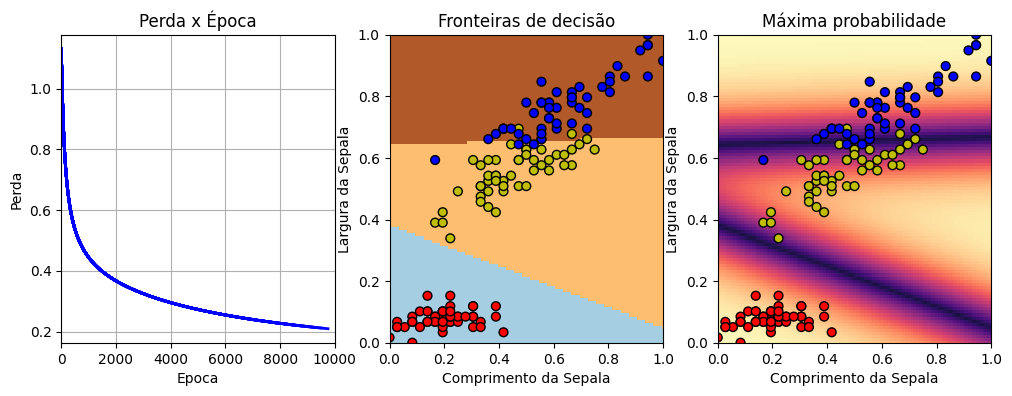

In [17]:
nb_epoch = 10000

#Definindo o plotter
my_plot = MyPlotter(model, Xc, Y, nb_epoch)

losses = []
for i in range(nb_epoch):
    # predict da rede
    output = model(Variable(X_tensor))

    # calcula a perda
    loss = criterion(output, Variable(Y_tensor))

    # Faz o backpropagation para calcular os gradientes e otimizar parâmetros
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.data.item())

    my_plot.on_epoch_end(i, {'loss': loss.item()});
    final_loss = loss.data.item()

print('Final loss:', final_loss)

## Avaliação

### Parâmetros após treinamento

In [18]:
model.state_dict()

OrderedDict([('weight',
              tensor([[ -2.8087, -14.7653],
                      [  1.8509,  -0.7052],
                      [  1.3721,  15.2818]])),
             ('bias', tensor([ 6.5443,  1.1919, -9.0418]))])

### Salvando os parâmetros treinados

In [19]:
os.makedirs('../models',exist_ok=True)
torch.save(model.state_dict(),'../models/RegrLog_Iris.pt')

In [20]:
! ls ../models/

RegrLog_Iris.pt


In [21]:
nn.init.constant(model.weight,0)
model.state_dict()

<ipython-input-21-0d5512203613>:1: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  nn.init.constant(model.weight,0)


OrderedDict([('weight',
              tensor([[0., 0.],
                      [0., 0.],
                      [0., 0.]])),
             ('bias', tensor([ 6.5443,  1.1919, -9.0418]))])

### Recuperando os pesos salvos

In [22]:
param_saved = torch.load('../models/RegrLog_Iris.pt')
model.load_state_dict(param_saved)
model.state_dict()

OrderedDict([('weight',
              tensor([[ -2.8087, -14.7653],
                      [  1.8509,  -0.7052],
                      [  1.3721,  15.2818]])),
             ('bias', tensor([ 6.5443,  1.1919, -9.0418]))])

### Exatidão (acurácia) do classificador

Acurácia indica o número de acertos sobre o número total de amostras

In [23]:
Y_pred = predict(model, X_tensor)
accuracy = (Y_pred == Y).mean()
print('Training Accuracy: ', accuracy)

Training Accuracy:  0.96


### Matriz de confusão

In [24]:
import pandas as pd
pd.crosstab(Y_pred, Y)

col_0,0,1,2
row_0,,,
0,50,0,0
1,0,47,3
2,0,3,47


## Atividades

### Perguntas:

1. Observe que se após o treinamento, a célula for executada novamente, ela continua utilizando os parâmetros treinados até sua última execução. O que é preciso fazer para que o treinamento comece deste o início, como da primeira vez que foi executado?

  R. Precisa reiniciar o modelo para que ele reinicie os pesos.



2. Quantos parâmetros possui esta rede? Quantos são da camada densa e quantos são de bias?

  R. Nove parâmetros (pesos). Seis da camada densa e três do bias.


3. Quantas entradas e quantas saídas esta rede possui?

  R. Duas entradas (+bias) e três saídas.


4. Como se pode calcular a acurácia a partir da matriz de confusão?

  R. Soma-se os valores da diagonal principal da matriz e divide pela soma total.


5. O que faz a função `torch.max`? Quantos parâmetros ela retorna e quais seus significados?
    - http://pytorch.org/docs/master/torch.html?highlight=torch%20max#torch.max

    R. Essa função retorna o valor máximo de um tensor e os seu índice. Ela recebe um tensor e retorna uma tupla que contem o valor máximo e o índice desse valor máximo no tensor.

### Exercícios:

1. Experimente refazer o treinamento com diferentes valores de learning rate
2. Na opção de mostrar o valor das probabilidades no gráfico do espaço de atributos,
troque a tabela de cores **magma** utilizada no `pcolormesh` que está com o parâmetro `cmap=plt.cm.magma`. Escolha a tabela de cores consultando o manual do matplotlib:
    - https://matplotlib.org/users/colormaps.html
3. Observando o gráfico de máxima probabilidade, responda:
  1. Qual é a amostra classificada corretamente, com maior probabilidade?
    
    R. A que está no extremo superior ou inferior do gráfico de máxima probabilidade.

  2. Qual é a amostra classificada erradamente, com maior
probabilidade?

    R. A primeira amarela, olhando de cima para baixo. Pois está mais afastada da linha de decisão (maior probabilidade).
    
  3. Qual é a amostra classificada corretamente, com menor probabilidade?

    R. Alguma que está próxima a linha de decisão entre o azul e o amarelo.

  4. Qual é a amostra classificada erradamente, com menor probabilidade?

    R. A segunda amostra do amarelo parece estar nesse caso, pois parece estar ligeiramente mais próximo da classificação do azul, mas está muito próxima à linha de decisão (probabilidade baixa).

## Principais aprendizados

1. Usa-se a rede Linear, com um neurônio para cada classe prevista.
2. O bloco Softmax é responsável por converter a saída da rede (scores) para probabilidades.
3. Cuidado no uso do eixo de normalização do Softmax (eixo de atributos)
4. Acurácia (exatidão) e matriz de confusão são métricas para medir o desempenho de classificadores.